In [28]:
# Importing the necessary libraries
import pandas as pd

# Load the uploaded train and test datasets
validation_data_path = '/content/twitter_validation.csv'
training_data_path = '/content/twitter_training.csv.zip'

# Read the CSV files into Pandas DataFrames
validation_data = pd.read_csv(validation_data_path)
training_data = pd.read_csv(training_data_path)

# Display first few rows of both datasets
validation_data_head = validation_data.head()
training_data_head = training_data.head()

validation_data_head, training_data_head

(   3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
 0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
 1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
 2  CSGO matchmaking is so full of closet hacking,

In [29]:
# It looks like the datasets might not have been parsed correctly due to improper formatting. Let's try loading both files again, but this time we will inspect their structure carefully before merging.

# Load the datasets with additional options to handle formatting issues
validation_data_clean = pd.read_csv(validation_data_path, on_bad_lines = 'skip')
training_data_clean = pd.read_csv(training_data_path, on_bad_lines = 'skip')

# Inspect the first few rows again to see if they have been loaded correctly this time
validation_data_clean.head(), training_data_clean.head()

(   3364   Facebook Irrelevant  \
 0   352     Amazon    Neutral   
 1  8312  Microsoft   Negative   
 2  4371      CS-GO   Negative   
 3  4433     Google    Neutral   
 4  6273       FIFA   Negative   
 
   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
 0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
 1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                  
 2  CSGO matchmaking is so full of closet hacking,

In [30]:
# Let's manually clean and reorganize the dataset columns to ensure proper analysis
# For now, we'll focus on extracting the 'Brand', 'Sentiment', and 'Text' columns from the data

# Manually create column names for both datasets
validation_columns = ['ID', 'Brand', 'Sentiment', 'Text']
training_columns = ['ID', 'Brand', 'Sentiment', 'Text']

# Apply the column names to both datasets
validation_data_clean.columns = validation_columns
training_data_clean.columns = training_columns

# Now let's filter for 'Amazon' and 'Microsoft' again after the cleanup
amazon_microsoft_data_cleaned = pd.concat([
    validation_data_clean[validation_data_clean['Brand'].isin(['Amazon', 'Microsoft'])],
    training_data_clean[training_data_clean['Brand'].isin(['Amazon', 'Microsoft'])]
])

# Check the distribution of sentiment for Amazon and Microsoft
sentiment_counts_cleaned = amazon_microsoft_data_cleaned.groupby(['Brand', 'Sentiment']).size().unstack(fill_value = 0)

# Display sentiment distribution
sentiment_counts_cleaned

Sentiment,Irrelevant,Negative,Neutral,Positive
Brand,,,,
Amazon,195,582,1254,319
Microsoft,175,781,852,620


# **Sentiment analysis for Amazon and Microsoft:**

# Amazon:
Irrelevant: 195 mentions

Negative: 582 mentions

Neutral: 1,254 mentions

Positive: 319 mentions

# Microsoft:
Irrelevant: 175 mentions

Negative: 781 mentions

Neutral: 852 mentions

Positive: 620 mentions

The above sentiment analysis suggests that both brands have a higher number of neutral mentions while Microsoft has a slightly more positive sentiment compared to Amazon. However, both brands also experience a significant amount of negative sentiment.

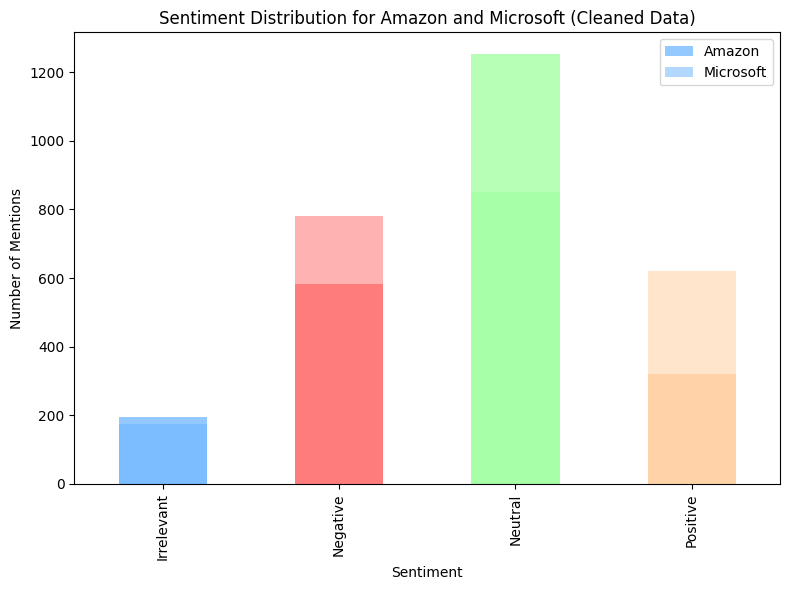

In [31]:
# Let's plot the sentiment trends for both Amazon and Microsoft using the cleaned data

# Plotting sentiment distribution for Amazon and Microsoft

# Importing the necessary libraries
import matplotlib.pyplot as plt

# Set up plot
plt.figure(figsize = (8, 6))

# Plot sentiment distribution for Amazon
sentiment_counts_cleaned.loc['Amazon'].plot(kind = 'bar', color = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99'], label = 'Amazon', alpha = 0.7)

# Plot sentiment distribution for Microsoft
sentiment_counts_cleaned.loc['Microsoft'].plot(kind = 'bar', color = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99'], label = 'Microsoft', alpha = 0.5)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Mentions')
plt.title('Sentiment Distribution for Amazon and Microsoft (Cleaned Data)')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

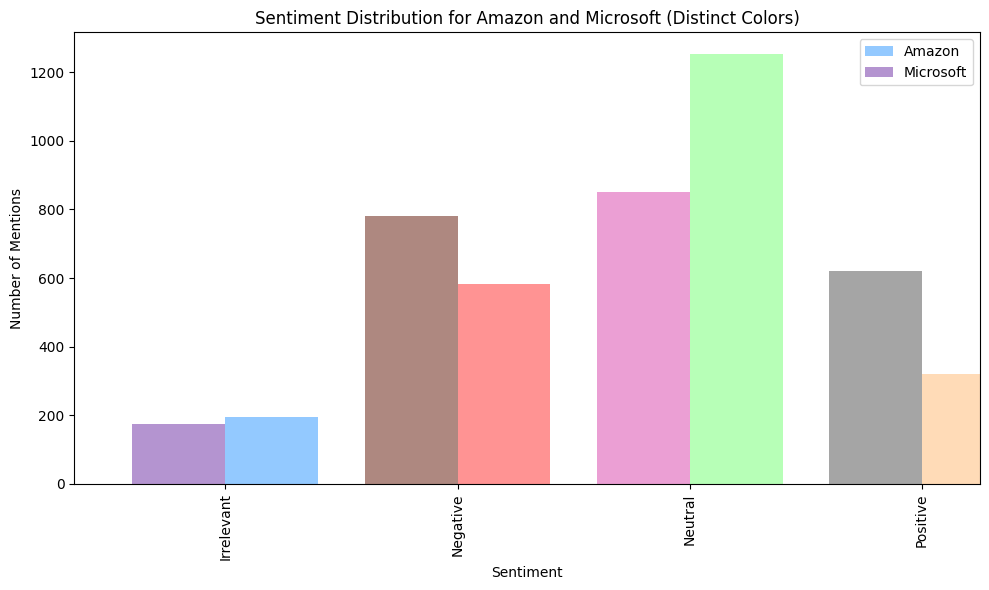

In [32]:
# Setting up side by side plot to improve clarity
plt.figure(figsize = (10, 6))

colors_amazon = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99']
colors_microsoft = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Plot sentiment distribution for Amazon
sentiment_counts_cleaned.loc['Amazon'].plot(kind = 'bar', color = colors_amazon, label='Amazon', alpha = 0.7, position = 0, width = 0.4)

# Plot sentiment distribution for Microsoft
sentiment_counts_cleaned.loc['Microsoft'].plot(kind = 'bar', color = colors_microsoft, label='Microsoft', alpha = 0.7, position = 1, width = 0.4)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Mentions')
plt.title('Sentiment Distribution for Amazon and Microsoft (Distinct Colors)')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()